# Prodigy_Ds_03

#### Task 03 - Build a decision tree classifier on Bank Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("C:/Users/hp/OneDrive/Desktop/bank/bank/bank-full.csv",delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
data.duplicated().sum()

0

In [11]:
data.drop(columns=['day','month','duration','campaign','pdays','previous'],inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,unknown,no


Changing the categorical data into numerical data

In [12]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()   ###Defining LabelEncoder
def labelencoderconvert(a):
    le.fit(data[a].values)    ###Training dataset
    data[a]=le.transform(data[a].values)  ### Implemnenting Label Encoder

In [13]:
labelencoderconvert('job')
labelencoderconvert('marital')
labelencoderconvert('education')
labelencoderconvert('default')
labelencoderconvert('housing')
labelencoderconvert('loan')
labelencoderconvert('contact')
labelencoderconvert('poutcome')
labelencoderconvert('y')
data

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,58,4,1,2,0,2143,1,0,2,3,0
1,44,9,2,1,0,29,1,0,2,3,0
2,33,2,1,1,0,2,1,1,2,3,0
3,47,1,1,3,0,1506,1,0,2,3,0
4,33,11,2,3,0,1,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,3,1
45207,71,5,0,0,0,1729,0,0,0,3,1
45208,72,5,1,1,0,5715,0,0,0,2,1
45209,57,1,1,1,0,668,0,0,1,3,0


In [14]:
data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,0.272214,-0.148395
poutcome,0.007367,0.011010,-0.016850,-0.019361,0.034898,-0.020967,-0.099971,0.015458,0.272214,1.000000,-0.077840


#### Model 

In [41]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
X=data.drop(columns=['y'])
Y=data['y']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [35]:
dt=DecisionTreeClassifier(criterion='gini')

In [36]:
dt.fit(x_train,y_train)
y_prede = dt.predict(x_test)
accuracy_score(y_test,y_prede)

0.8231781488444101

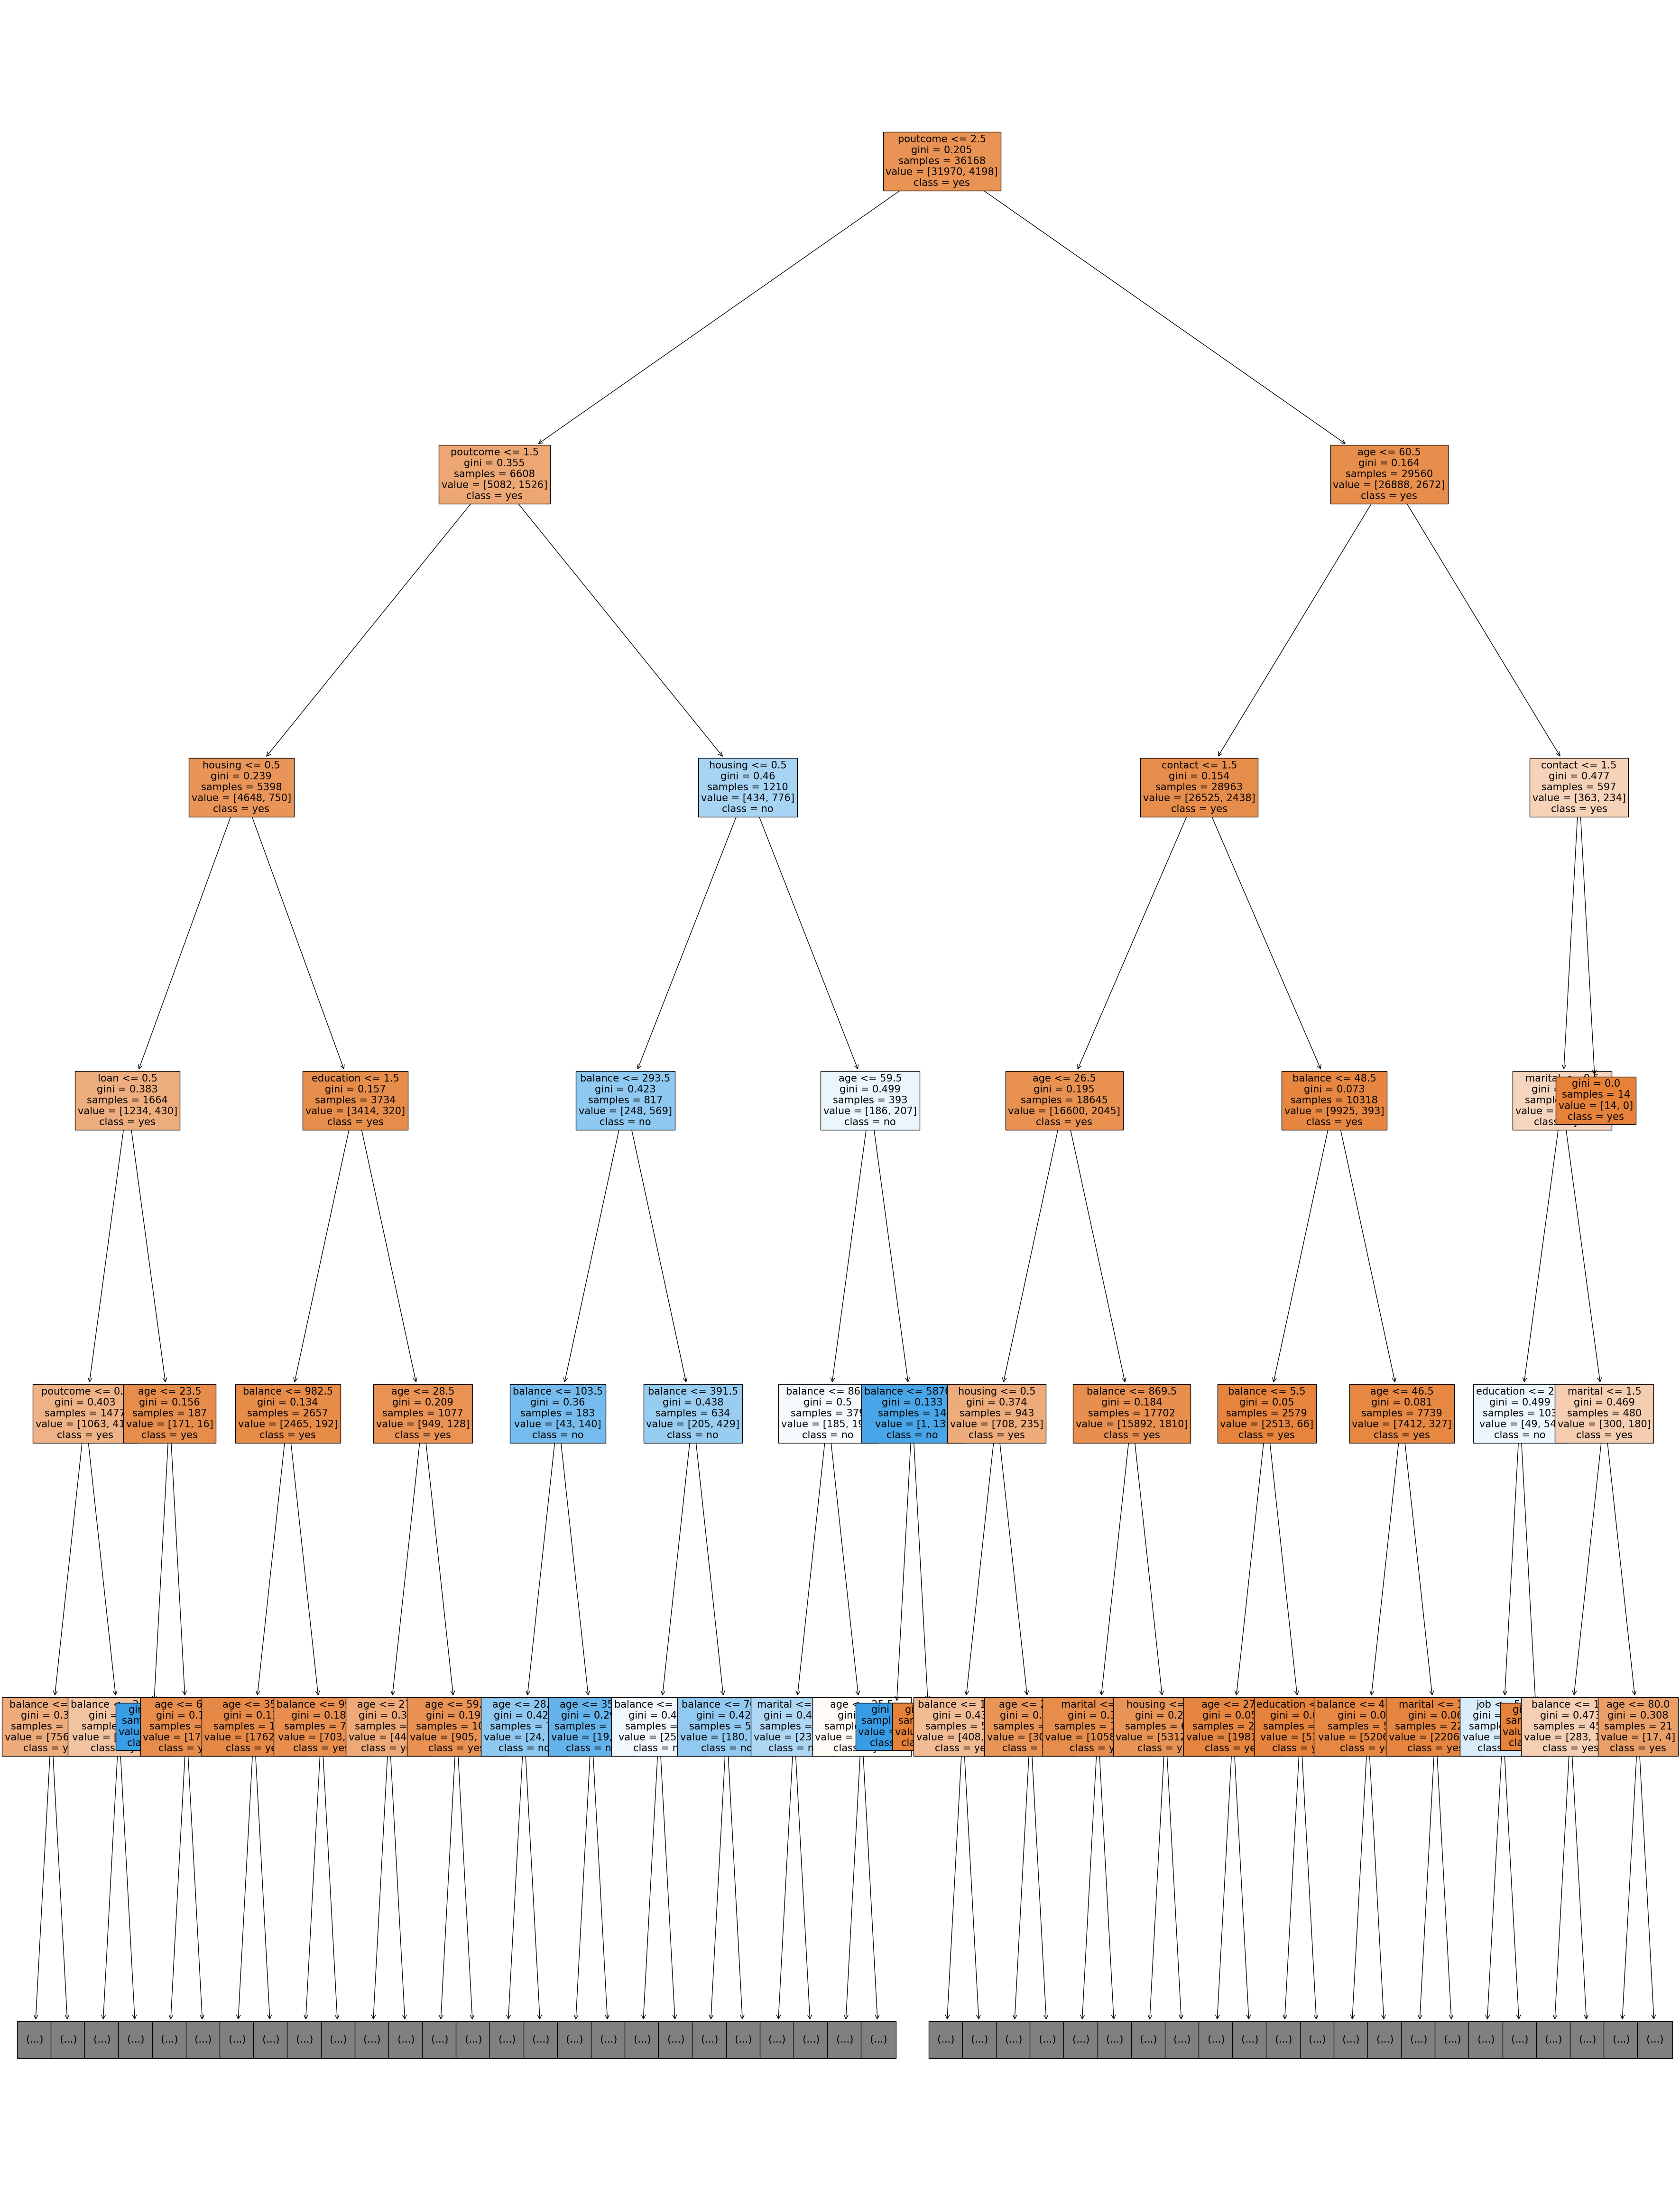

In [47]:
plt.figure(figsize=(45, 60))
_ = tree.plot_tree(dt, max_depth=5, feature_names=X.columns, class_names=['yes', 'no'], filled=True , fontsize=15)